In [1]:
from copy import deepcopy
from itertools import combinations
import typing as tp

# For soliving lin prog task interior-point algorithm
# is used, it will raise lots of warnings for `bad` matrices
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from numpy.linalg import lstsq
from scipy.optimize import linprog

from matplotlib import pyplot as plt
from citk.layer import Dense, FuzzyGMDHLayer
from citk.model import FFN, GMDH
from citk.functions import ReLU, Linear, BellMembership, GaussianMembership, Poly
from citk.losses import MSE, FMSE
from citk.optimisers import SGDOptimizer

from utils import get_and_process_boston_dataset, visualise_boston, seed_everything

%matplotlib inline

# Data

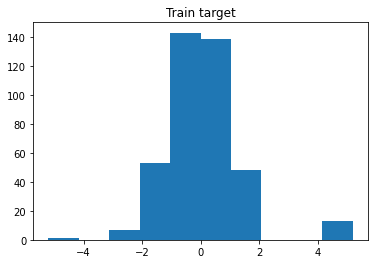

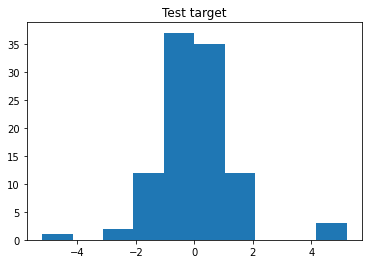

In [2]:
RANDOM_SEED = 42

seed_everything(RANDOM_SEED)

X_train, X_test, y_train, y_test = get_and_process_boston_dataset(random_state=RANDOM_SEED)

visualise_boston(X_train, X_test, y_train, y_test)

# GMDH 

In [3]:
model = GMDH(
            method_type='fuzzy', 
            poli_type='quadratic',
            loss=MSE, 
            confidence=0.9,
        )

In [4]:
model, history  = model.fit(
    (X_train, y_train),
    (X_test, y_test),
    max_gmdh_layers=6,
    n_best_to_take=20,
    batch_size=64,
    verbose=True,
)

Training :   0%|          | 0/6 [00:00<?, ?it/s]

One fit:   0%|          | 0/78 [00:00<?, ?it/s]

Layer: 0. Metric: 0.9608228957546737


One fit:   0%|          | 0/190 [00:00<?, ?it/s]

Layer: 1. Metric: 0.7895005687370932


One fit:   0%|          | 0/190 [00:00<?, ?it/s]

Layer: 2. Metric: 0.6601221089461191


One fit:   0%|          | 0/190 [00:00<?, ?it/s]

Layer: 3. Metric: 0.5485473540159781


One fit:   0%|          | 0/190 [00:00<?, ?it/s]

Layer: 4. Metric: 0.4981718167990625


One fit:   0%|          | 0/190 [00:00<?, ?it/s]

Layer: 5. Metric: 0.4326555373591404


In [5]:
model.predict_history

{'pairs': [[(4, 12),
   (7, 12),
   (8, 12),
   (10, 12),
   (2, 12),
   (1, 12),
   (5, 9),
   (9, 12),
   (5, 8),
   (5, 10),
   (1, 12),
   (5, 12),
   (10, 12),
   (10, 12),
   (3, 12),
   (4, 5),
   (5, 12),
   (5, 10),
   (1, 5),
   (5, 7)],
  [(0, 16),
   (1, 9),
   (1, 7),
   (2, 9),
   (2, 16),
   (0, 12),
   (4, 8),
   (1, 2),
   (1, 8),
   (4, 12),
   (0, 8),
   (4, 16),
   (3, 4),
   (1, 12),
   (0, 17),
   (0, 2),
   (0, 1),
   (5, 16),
   (1, 11),
   (4, 7)],
  [(1, 3),
   (1, 4),
   (0, 1),
   (4, 10),
   (1, 16),
   (2, 4),
   (1, 17),
   (0, 4),
   (4, 13),
   (1, 5),
   (1, 7),
   (0, 8),
   (1, 15),
   (3, 13),
   (2, 3),
   (3, 8),
   (1, 14),
   (4, 8),
   (5, 18),
   (4, 18)],
  [(6, 18),
   (16, 18),
   (0, 11),
   (13, 15),
   (3, 9),
   (3, 6),
   (6, 14),
   (1, 7),
   (5, 19),
   (6, 17),
   (8, 11),
   (8, 16),
   (0, 6),
   (1, 18),
   (1, 6),
   (5, 18),
   (13, 18),
   (7, 18),
   (6, 8),
   (0, 5)],
  [(0, 8),
   (5, 15),
   (9, 15),
   (0, 11),
   (0, 1

# Predict and Visualise losses

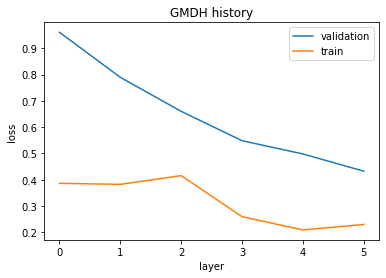

In [5]:
plt.title('GMDH history')
plt.plot(history['validation_loss'], label='validation')
plt.plot(history['train_loss'], label='train')
plt.xlabel('layer')
plt.ylabel('loss')
plt.legend()
plt.show()

In [6]:
prediction = model.predict(X_test)
prediction_train = model.predict(X_train)

In [7]:
print(f"Test MSE: {MSE(y_test, prediction)[0]}")
print(f"Train MSE: {MSE(y_train, prediction_train)[0]}")

Test MSE: 0.43265553736951806
Train MSE: 94.08146264586175


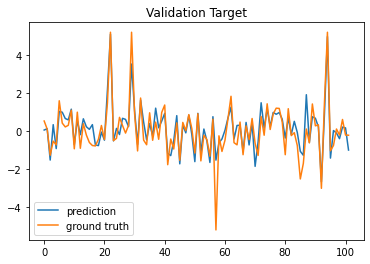

In [8]:
plt.title('Validation Target')
plt.plot(prediction, label='prediction')
plt.plot(y_test, label='ground truth')
plt.legend()
plt.show()

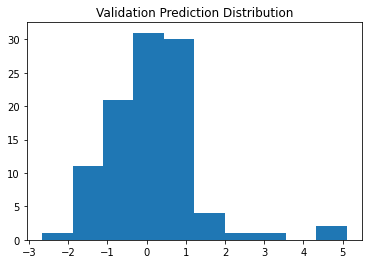

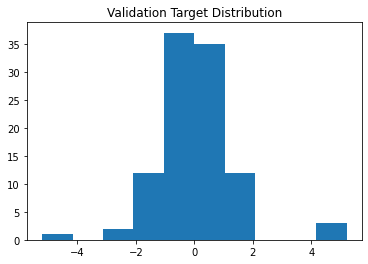

In [9]:
plt.title('Validation Prediction Distribution')
plt.hist(prediction)
plt.show()

plt.title('Validation Target Distribution')
plt.hist(y_test)
plt.show()